In [91]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [92]:
tree_df = pd.read_csv('Tree_Inventory_20241009.csv')
tree_df

/var/folders/xj/24kvg1ds7mv3ntbbfv1kwrlh0000gn/T/ipykernel_67821/2772770895.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  tree_df = pd.read_csv('Tree_Inventory_20241009.csv')


Editing     Botanical Name        Common Name   DBH  \
0       Buffalo             VACANT             VACANT   0.0   
1       Buffalo                  0                  0   2.0   
2       Buffalo             VACANT             VACANT   0.0   
3       Buffalo             VACANT             VACANT   0.0   
4       Buffalo  unsuitable vacant  unsuitable vacant   0.0   
...         ...                ...                ...   ...   
133232  Olmsted   ACER SACCHARINUM      MAPLE, SILVER  36.0   
133233  Olmsted             VACANT             VACANT   0.0   
133234  Olmsted        PINUS NIGRA     PINE, AUSTRIAN  18.0   
133235  Olmsted             VACANT             VACANT   0.0   
133236  Olmsted             VACANT             VACANT   0.0   

        Total Yearly Eco Benefits ($)  Stormwater Benefits ($)  \
0                                0.00                     0.00   
1                                0.00                     0.00   
2                                0.00                     0.00   
3                                0.00                     0.00   
4                                0.00                     0.00   
...                               ...                      ...   
133232                         237.14                    37.74   
133233                           0.00                     0.00   
133234                          91.24                     5.99   
133235                           0.00                     0.00   
133236                           0.00                     0.00   

        Stormwater Gallons Saved  Greenhouse CO2 Benefits ($)  \
0                           0.00                         0.00   
1                           0.00                         0.00   
2                           0.00                         0.00   
3                           0.00                         0.00   
4                           0.00                         0.00   
...                          ...                          ...   
133232                   4716.94                         2.38   
133233                      0.00                         0.00   
133234                    748.92                         0.08   
133235                      0.00                         0.00   
133236                      0.00                         0.00   

        CO2 Avoided (in lbs.)  CO2 Sequestered (in lbs.)  ...  \
0                        0.00                       0.00  ...   
1                        0.00                       0.00  ...   
2                        0.00                       0.00  ...   
3                        0.00                       0.00  ...   
4                        0.00                       0.00  ...   
...                       ...                        ...  ...   
133232                 497.27                     341.92  ...   
133233                   0.00                       0.00  ...   
133234                  20.46                       5.73  ...   
133235                   0.00                       0.00  ...   
133236                   0.00                       0.00  ...   

                 Street    Side  Site  Council District  Park Name   Latitude  \
0             Wright Av   Front     1        University          0  42.927148   
1       Amherst St East   Front     1        University          0  42.942096   
2              Tyler St  In_Lot     1        University          0  42.952295   
3           Parkside Av   Front     1        University          0  42.952440   
4             Rounds Av   Front     1        University          0  42.947378   
...                 ...     ...   ...               ...        ...        ...   
133232     Cazenovia St  In_Lot     1             South  Cazenovia  42.840782   
133233      Parkside Av  In_Lot     1          Delaware   Delaware  42.939590   
133234      Parkside Av  In_Lot     1          Delaware   Delaware  42.940473   
133235      Parkside Av  In_Lot     1          Delaware   Delaware  42.938083   
13323

In [93]:
tree_df = tree_df.dropna()

for column in tree_df.columns:
        most_frequent_dtype = tree_df[column].map(type).mode()[0]
        tree_df = tree_df[tree_df[column].map(type) == most_frequent_dtype]



In [94]:
string_cols = []
for cols in tree_df.columns:
    if tree_df[cols].dtype == 'object':
        string_cols.append(cols)
tree_df[string_cols] = tree_df[string_cols].apply(lambda x: x.str.lower())
tree_df

Editing     Botanical Name        Common Name   DBH  \
0       buffalo             vacant             vacant   0.0   
1       buffalo                  0                  0   2.0   
2       buffalo             vacant             vacant   0.0   
3       buffalo             vacant             vacant   0.0   
4       buffalo  unsuitable vacant  unsuitable vacant   0.0   
...         ...                ...                ...   ...   
133232  olmsted   acer saccharinum      maple, silver  36.0   
133233  olmsted             vacant             vacant   0.0   
133234  olmsted        pinus nigra     pine, austrian  18.0   
133235  olmsted             vacant             vacant   0.0   
133236  olmsted             vacant             vacant   0.0   

        Total Yearly Eco Benefits ($)  Stormwater Benefits ($)  \
0                                0.00                     0.00   
1                                0.00                     0.00   
2                                0.00                     0.00   
3                                0.00                     0.00   
4                                0.00                     0.00   
...                               ...                      ...   
133232                         237.14                    37.74   
133233                           0.00                     0.00   
133234                          91.24                     5.99   
133235                           0.00                     0.00   
133236                           0.00                     0.00   

        Stormwater Gallons Saved  Greenhouse CO2 Benefits ($)  \
0                           0.00                         0.00   
1                           0.00                         0.00   
2                           0.00                         0.00   
3                           0.00                         0.00   
4                           0.00                         0.00   
...                          ...                          ...   
133232                   4716.94                         2.38   
133233                      0.00                         0.00   
133234                    748.92                         0.08   
133235                      0.00                         0.00   
133236                      0.00                         0.00   

        CO2 Avoided (in lbs.)  CO2 Sequestered (in lbs.)  ...  \
0                        0.00                       0.00  ...   
1                        0.00                       0.00  ...   
2                        0.00                       0.00  ...   
3                        0.00                       0.00  ...   
4                        0.00                       0.00  ...   
...                       ...                        ...  ...   
133232                 497.27                     341.92  ...   
133233                   0.00                       0.00  ...   
133234                  20.46                       5.73  ...   
133235                   0.00                       0.00  ...   
133236                   0.00                       0.00  ...   

                 Street    Side  Site  Council District  Park Name   Latitude  \
0             wright av   front     1        university          0  42.927148   
1       amherst st east   front     1        university          0  42.942096   
2              tyler st  in_lot     1        university          0  42.952295   
3           parkside av   front     1        university          0  42.952440   
4             rounds av   front     1        university          0  42.947378   
...                 ...     ...   ...               ...        ...        ...   
133232     cazenovia st  in_lot     1             south  cazenovia  42.840782   
133233      parkside av  in_lot     1          delaware   delaware  42.939590   
133234      parkside av  in_lot     1          delaware   delaware  42.940473   
133235      parkside av  in_lot     1          delaware   delaware  42.938083   
13323

In [95]:
Q1 = tree_df.select_dtypes(include='number').quantile(0.25)
Q3 = tree_df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = pd.DataFrame(False, index=tree_df.index, columns=tree_df.columns)
for column in tree_df.select_dtypes(include='number').columns:
    outliers[column] = (tree_df[column] < lower_bound[column]) | (tree_df[column] > upper_bound[column])
for column in tree_df.select_dtypes(include='number').columns:
    tree_df[column] = tree_df[column].where(~outliers[column], tree_df[column].median())
tree_df = tree_df.drop('location', axis=1)
print("Tree Inventory Data \n", tree_df.describe())

Tree Inventory Data 
                 DBH  Total Yearly Eco Benefits ($)  Stormwater Benefits ($)  \
count  67700.000000                   67700.000000             67700.000000   
mean       7.147293                      59.685102                 1.930983   
std        8.937849                      72.711756                 3.177354   
min      -10.000000                       0.000000                 0.000000   
25%        0.000000                       0.000000                 0.000000   
50%        3.000000                      29.310000                 0.490000   
75%       13.000000                     104.160000                 2.550000   
max       35.000000                     277.990000                13.460000   

       Stormwater Gallons Saved  Greenhouse CO2 Benefits ($)  \
count              67700.000000                 67700.000000   
mean                 241.346250                     0.045828   
std                  397.192988                     0.085640   
min       

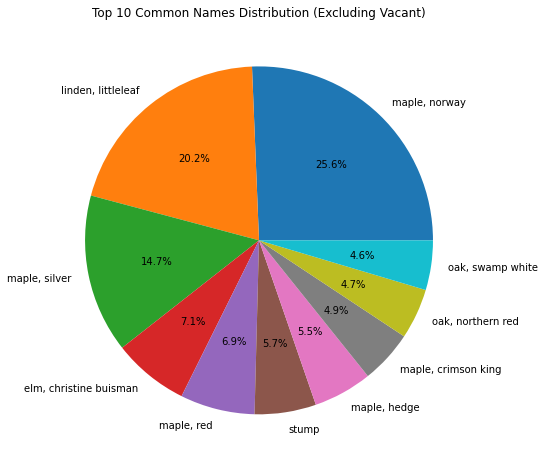

In [96]:
tree_df_cleaned = tree_df[tree_df['Common Name'] != 'vacant']
top_common_names = tree_df_cleaned['Common Name'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_common_names, labels=top_common_names.index, autopct='%1.1f%%')
plt.title('Top 10 Common Names Distribution (Excluding Vacant)')
plt.show()

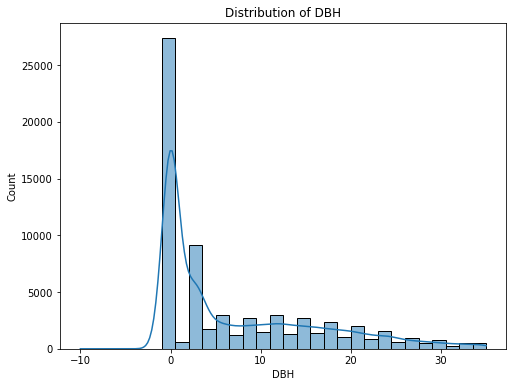

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(tree_df['DBH'], bins=30, kde=True)
plt.title('Distribution of DBH')
plt.show()


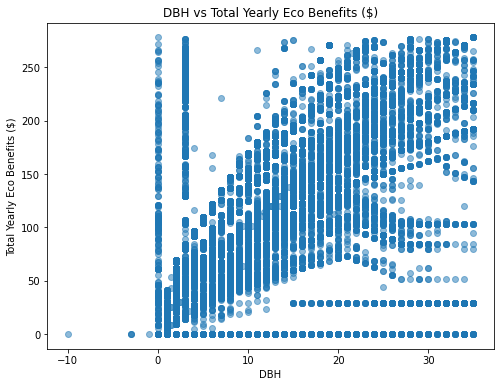

In [98]:
# Scatter plot for DBH vs Total Yearly Eco Benefits
plt.figure(figsize=(8, 6))
plt.scatter(tree_df['DBH'], tree_df['Total Yearly Eco Benefits ($)'], alpha=0.5)
plt.title('DBH vs Total Yearly Eco Benefits ($)')
plt.xlabel('DBH')
plt.ylabel('Total Yearly Eco Benefits ($)')
plt.show()

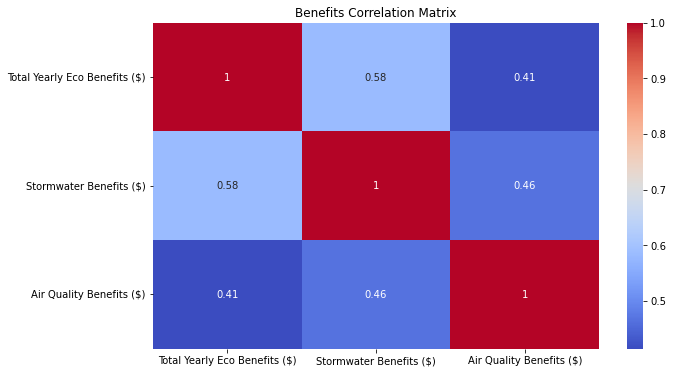

In [99]:
benefits_columns = ['Total Yearly Eco Benefits ($)', 'Stormwater Benefits ($)', 'Air Quality Benefits ($)']
benefits_matrix = tree_df[benefits_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(benefits_matrix, annot=True, cmap='coolwarm')
plt.title('Benefits Correlation Matrix')
plt.show()

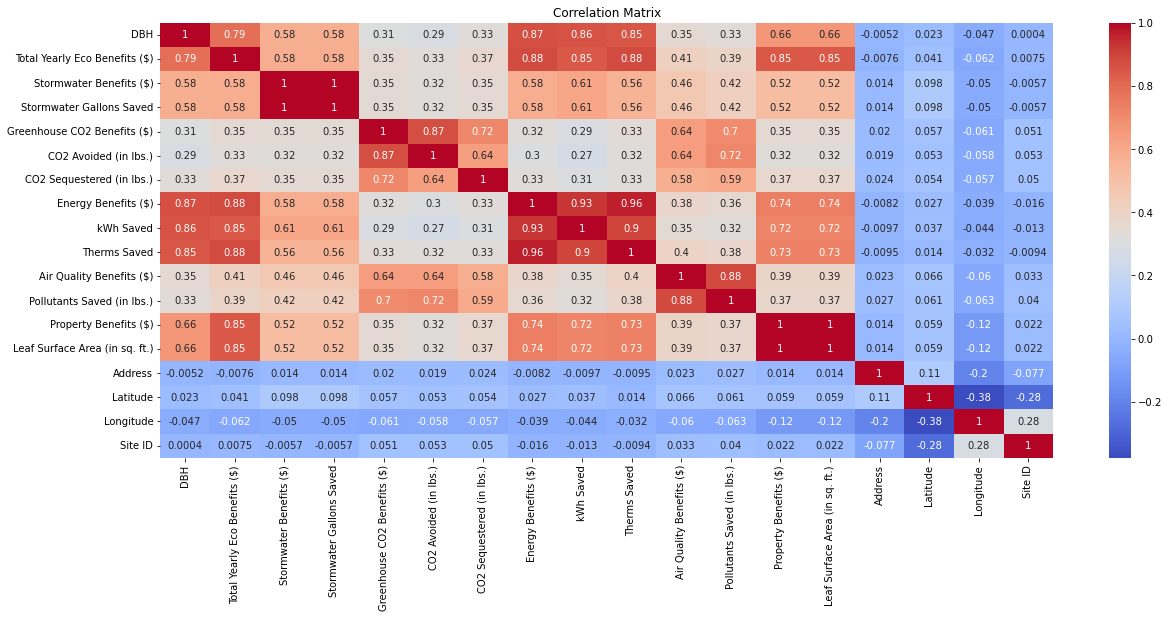

In [100]:
numeric_df = tree_df.select_dtypes(include=['number']).drop(columns=['Site'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [101]:
tree_df.columns

Index(['Editing', 'Botanical Name', 'Common Name', 'DBH',
       'Total Yearly Eco Benefits ($)', 'Stormwater Benefits ($)',
       'Stormwater Gallons Saved', 'Greenhouse CO2 Benefits ($)',
       'CO2 Avoided (in lbs.)', 'CO2 Sequestered (in lbs.)',
       'Energy Benefits ($)', 'kWh Saved', 'Therms Saved',
       'Air Quality Benefits ($)', 'Pollutants Saved (in lbs.)',
       'Property Benefits ($)', 'Leaf Surface Area (in sq. ft.)', 'Address',
       'Street', 'Side', 'Site', 'Council District', 'Park Name', 'Latitude',
       'Longitude', 'Site ID', 'Location'],
      dtype='object')

In [102]:
columns_to_exclude = ['Street', 'Location', 'Park Name', 'Latitude', 'Longitude', 'Site ID']
tree_df_filtered = tree_df.drop(columns=columns_to_exclude)
tree_df_encoded = pd.get_dummies(tree_df_filtered, columns=['Editing', 'Botanical Name', 'Common Name', 'Side', 'Council District'], drop_first=True)
correlation_matrix = tree_df_encoded.corr()
benefits_correlations = correlation_matrix['Total Yearly Eco Benefits ($)'].sort_values(ascending=False)
print("Correlations of features with Total Yearly Eco Benefits ($):")
print(benefits_correlations)
threshold = 0.1
low_correlation_features = benefits_correlations[benefits_correlations.abs() < threshold].index.tolist()

print(f"Features having low correlation with Total Yearly Eco Benefits ($): {low_correlation_features}")
tree_df_encoded = tree_df_encoded.drop(columns=low_correlation_features)


Correlations of features with Total Yearly Eco Benefits ($):
Total Yearly Eco Benefits ($)     1.000000
Therms Saved                      0.879391
Energy Benefits ($)               0.878924
kWh Saved                         0.849116
Leaf Surface Area (in sq. ft.)    0.847521
                                    ...   
Common Name_stump                -0.078523
Council District_ellicott        -0.090780
Common Name_vacant               -0.665892
Botanical Name_vacant            -0.665892
Site                                   NaN
Name: Total Yearly Eco Benefits ($), Length: 648, dtype: float64
Features having low correlation with Total Yearly Eco Benefits ($): ['Botanical Name_pyrus calleryana', 'Common Name_pear, callery', 'Botanical Name_populus deltoides', 'Common Name_cottonwood, eastern', "Botanical Name_acer platanoides 'crimson king'", 'Common Name_maple, crimson king', 'Side_in_lot', 'Common Name_horsechestnut, common', 'Botanical Name_aesculus hippocastanum', 'Common Name_london

In [103]:
non_categorical_columns = tree_df_encoded.select_dtypes(include=['number']).columns.tolist()
min_values = tree_df_encoded[non_categorical_columns].min()
max_values = tree_df_encoded[non_categorical_columns].max()
tree_df_encoded[non_categorical_columns] = (tree_df_encoded[non_categorical_columns] - min_values) / (max_values - min_values)
tree_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67700 entries, 0 to 133236
Data columns (total 30 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DBH                                                    67700 non-null  float64
 1   Total Yearly Eco Benefits ($)                          67700 non-null  float64
 2   Stormwater Benefits ($)                                67700 non-null  float64
 3   Stormwater Gallons Saved                               67700 non-null  float64
 4   Greenhouse CO2 Benefits ($)                            67700 non-null  float64
 5   CO2 Avoided (in lbs.)                                  67700 non-null  float64
 6   CO2 Sequestered (in lbs.)                              67700 non-null  float64
 7   Energy Benefits ($)                                    67700 non-null  float64
 8   kWh Saved                                    

In [104]:
class Logit_Regression():
    def __init__(self, learning_rate, iterations_count):
        self.learning_rate = learning_rate
        self.iterations_count = iterations_count
        self.weights = None
        self.loss = []
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, y, y_hat):
        N = len(y)
        return (1/N) * np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    
    def gradient_descent(self,X, y):
        N = len(y)
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        delta = y_hat - y
        x_trans = np.transpose(X)
        dW = np.dot(x_trans,delta)/N
        db = np.sum(delta)/N
        self.bias = self.bias - self.learning_rate*db
        self.weights = self.weights - self.learning_rate*dW
        return self.weights, y_hat

    def fit(self,X,y):
        self.weights = np.random.uniform(0, 1, size=(X.shape[1], 1))
        self.bias = 0
        for i in range(self.iterations_count):
            self.weights, y_hat = self.gradient_descent(X,y)
            c = self.cost(y, y_hat)
            self.loss.append(c)
            print(f"Iteration {i}:\nLoss is {c}\n")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        return y_hat
    
    def accuracy(self, y, y_hat):
        y_hat_bin = (y_hat > 0.5).astype(int)
        y_bin = (y > 0.5).astype(int)
        predictions = np.sum(y_hat_bin == y_bin)
        acc = predictions / len(y)
        return acc
    
    def loss_graph(self):
        plt.plot(range(self.iterations_count), self.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Over Iterations')
        plt.show()




X_train shape: (54160, 14)
y_train shape: (54160, 1)
X_test shape: (13540, 14)
y_test shape: (13540, 1)
Iteration 0:
Loss is 1.0144327647747782

Iteration 1:
Loss is 1.0141094539472304

Iteration 2:
Loss is 1.0137862878869321

Iteration 3:
Loss is 1.0134632665715928

Iteration 4:
Loss is 1.0131403899788871

Iteration 5:
Loss is 1.012817658086454

Iteration 6:
Loss is 1.0124950708718987

Iteration 7:
Loss is 1.0121726283127903

Iteration 8:
Loss is 1.011850330386663

Iteration 9:
Loss is 1.0115281770710167

Iteration 10:
Loss is 1.011206168343316

Iteration 11:
Loss is 1.0108843041809903

Iteration 12:
Loss is 1.010562584561434

Iteration 13:
Loss is 1.0102410094620082

Iteration 14:
Loss is 1.0099195788600366

Iteration 15:
Loss is 1.00959829273281

Iteration 16:
Loss is 1.009277151057584

Iteration 17:
Loss is 1.0089561538115785

Iteration 18:
Loss is 1.0086353009719802

Iteration 19:
Loss is 1.0083145925159398

Iteration 20:
Loss is 1.0079940284205733

Iteration 21:
Loss is 1.0076736

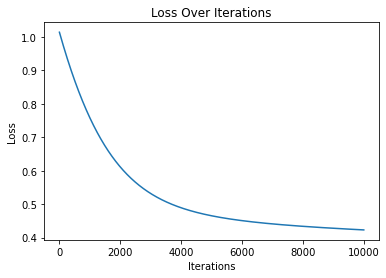

Test Accuracy 1:  93.59675036927622


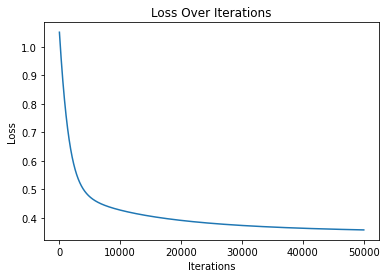

Test Accuracy 2:  95.43574593796158


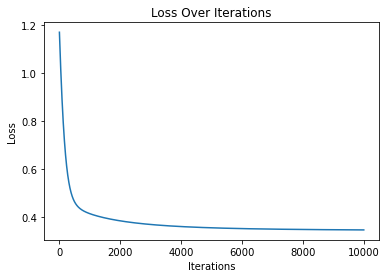

In [105]:
X = tree_df_encoded[['DBH', 'Stormwater Benefits ($)', 'Stormwater Gallons Saved', 'Greenhouse CO2 Benefits ($)', 'CO2 Avoided (in lbs.)', 'CO2 Sequestered (in lbs.)', 'Energy Benefits ($)', 'kWh Saved', 'Therms Saved', 'Air Quality Benefits ($)', 'Pollutants Saved (in lbs.)', 'Property Benefits ($)', 'Leaf Surface Area (in sq. ft.)', 'Editing_olmsted']].values
Y = tree_df_encoded['Total Yearly Eco Benefits ($)'].values.reshape(-1, 1) 
N = X.shape[0] 
train_size = int(0.8 * N) 
index_number = np.arange(N)
np.random.shuffle(index_number)
train_indices = index_number[:train_size]
test_indices = index_number[train_size:]
X_train = X[train_indices]
y_train = Y[train_indices]
X_test = X[test_indices]
y_test = Y[test_indices]
min_values_x = X_train.min(axis=0)
max_values_x = X_train.max(axis=0)
min_values_xt = X_test.min(axis=0)
max_values_xt = X_test.max(axis=0)
min_values_y = y_train.min(axis = 0)
max_values_y = y_train.max(axis = 0)
min_values_yt = y_test.min(axis = 0)
max_values_yt = y_test.max(axis = 0)
X_train = (X_train - min_values_x) / (max_values_x - min_values_x)
X_test = (X_test - min_values_xt) / (max_values_xt - min_values_xt)
y_train = (y_train - min_values_y) / (max_values_y - min_values_y)
y_test = (y_test - min_values_yt) / (max_values_yt - min_values_yt)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


learning_rate_0 = 0.001
iterations_count_0 = 10000
model_0 = Logit_Regression(learning_rate_0, iterations_count_0)
model_0.fit(X_train, y_train)
y_pred_0 = model_0.predict(X_test)
test_accuracy_0 = model_0.accuracy(y_test, y_pred_0)

learning_rate = 0.001
iterations_count = 50000
model = Logit_Regression(learning_rate, iterations_count)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = model.accuracy(y_test, y_pred)

learning_rate_1 = 0.01
iterations_count_1 = 10000
model_1 = Logit_Regression(learning_rate_1, iterations_count_1)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
test_accuracy_1 = model_1.accuracy(y_test, y_pred_1)


print(f"Test Accuracy 0: ",test_accuracy_0 * 100)
model_0.loss_graph()
print(f"Test Accuracy 1: ",test_accuracy * 100)
model.loss_graph()
print(f"Test Accuracy 2: ",test_accuracy_1 * 100)
model_1.loss_graph()
